# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

In [1]:
# Answer to Q1.1
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

player_data = pd.read_csv('Dataset_Assignment1.csv')

In [2]:
# Answer to Q1.2
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4903 entries, 0 to 4902
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4903 non-null   int64  
 1   Nationality               4903 non-null   object 
 2   Overall                   4903 non-null   int64  
 3   Potential                 4903 non-null   int64  
 4   Club                      4903 non-null   object 
 5   Value                     4903 non-null   int64  
 6   Wage                      4903 non-null   int64  
 7   Preferred Foot            4903 non-null   object 
 8   International Reputation  4903 non-null   int64  
 9   Weak Foot                 4903 non-null   float64
 10  Skill Moves               4903 non-null   int64  
 11  Body Type                 4903 non-null   object 
 12  Position                  4903 non-null   object 
 13  Height                    4903 non-null   int64  
 14  Weight  

In [3]:
# Answer to Q1.2
player_data.describe()

Age      Overall    Potential         Value           Wage  \
count  4903.000000  4903.000000  4903.000000  4.903000e+03    4903.000000   
mean     25.751581    68.072813    71.803794  1.060544e+08  254401.956761   
std       4.483194     5.856349     6.041527  2.586460e+07   60397.996588   
min      16.000000    47.000000    51.000000  1.000000e+03     500.000000   
25%      22.000000    64.000000    68.000000  8.888233e+07  213967.000000   
50%      25.000000    68.000000    72.000000  1.060088e+08  254261.000000   
75%      29.000000    72.000000    76.000000  1.235056e+08  296459.000000   
max      44.000000    91.000000    95.000000  1.905000e+08  450000.000000   

       International Reputation    Weak Foot  Skill Moves       Height  \
count               4903.000000  4903.000000  4903.000000  4903.000000   
mean                   3.046706     2.992046     3.117275   181.053437   
std                    0.655191     0.689830     0.677126     6.979453   
min                    1.000000     1.000000     1.000000   156.000000   
25%                    3.000000     3.000000     3.000000   176.000000   
50%                    3.000000     3.000000     3.000000   181.000000   
75%                    3.000000     3.000000     4.000000   186.000000   
max                    5.000000     5.000000     5.000000   206.000000   

            Weight  
count  4903.000000  
mean     75.154803  
std       7.048869  
min      49.000000  
25%      70.000000  
50%      75.000000  
75%      80.000000  
max     102.000000

In [4]:
# Answer to Q1.2
player_data.isnull().sum()

Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Body Type                   0
Position                    0
Height                      0
Weight                      0
dtype: int64

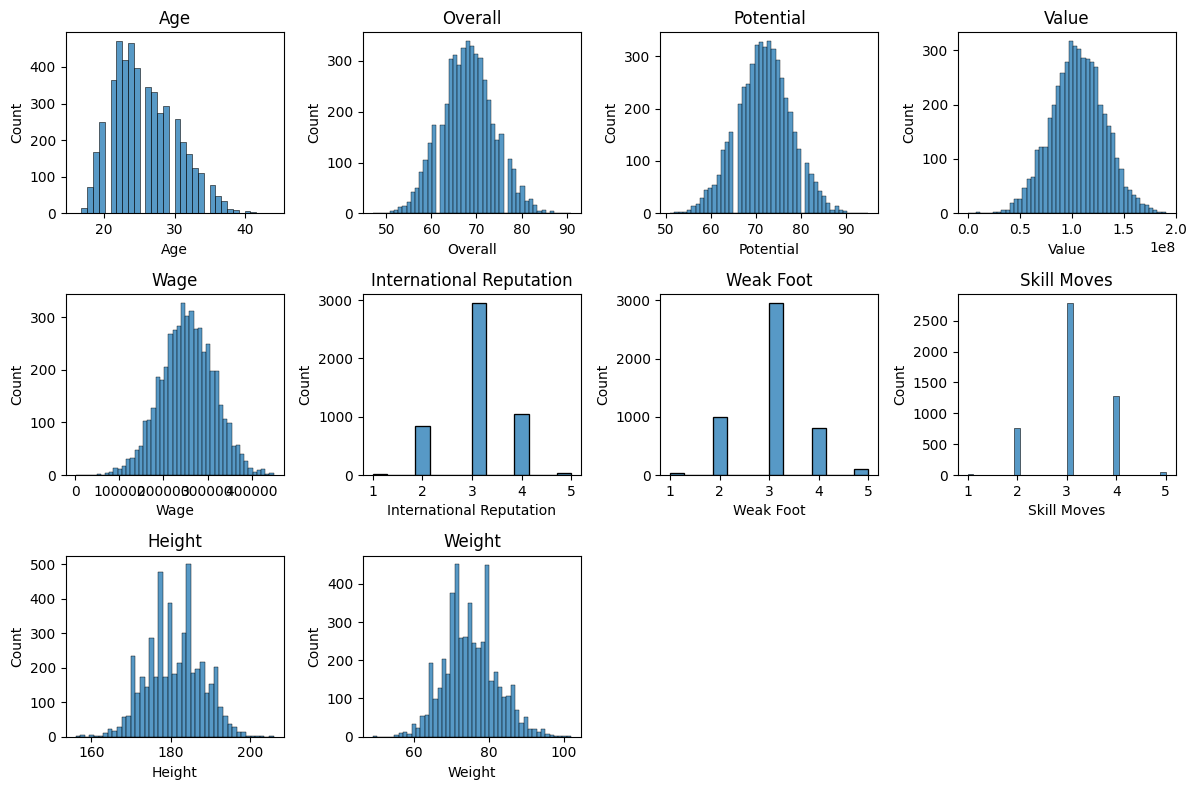

In [5]:
# Answer to Q1.3
numeric_cols = player_data.select_dtypes(include=['int64', 'float64']).columns

fig, axs = plt.subplots(3, 4, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(player_data[col], ax=axs[i])
    axs[i].set_title(f'{col}')

for j in range(len(numeric_cols), len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


**Answer to Q1.4**: 
It is important to visualize and explore the data before choosing a model because this allows us to see the ranges and variables that we are working with, as well as see any missing or impossible data that might be in the dataset that we missed before. We can see what variables have a normal distribution vs other types of distribution which would not be visible from viewing just the numbers without a distribution graph.

# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

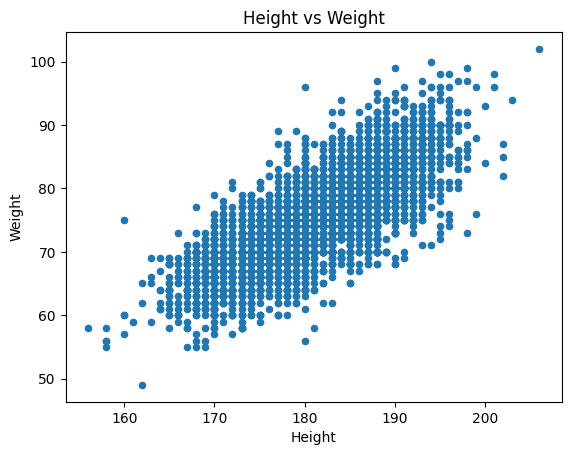

In [6]:
# Answer to Q2.1
player_data.plot(x='Height', y='Weight', kind='scatter')
plt.title('Height vs Weight')
plt.show()

In [7]:
# Answer to Q2.2
height_m = player_data['Height']/100
player_data['BMI'] = player_data['Weight']/(height_m ** 2)
player_data = player_data.drop(columns=['Height', 'Weight'])

# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

In [8]:
# Answer to Q3.1
numeric_cols = player_data.select_dtypes(include=['int64', 'float64']).columns
cm = np.corrcoef(player_data[numeric_cols].values.T)

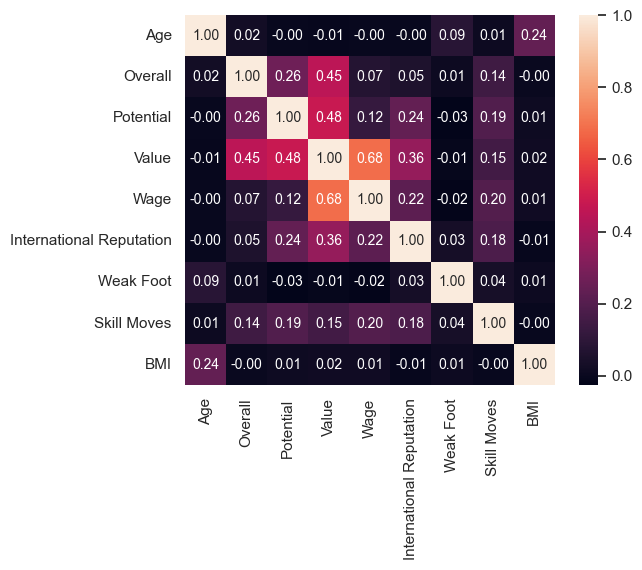

In [9]:
# Answer to Q3.2
sns.set(font_scale=1)
hm = sns.heatmap(cm,cbar=True,annot=True,
                 square=True,fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=numeric_cols,
                 xticklabels=numeric_cols)
plt.show()

In [10]:
# Answer to Q3.3
cm_df = pd.DataFrame(cm, index=numeric_cols, columns=numeric_cols)

value_corr = cm_df['Value'].drop('Value')

print("Max correlation with Value is", 
      max(abs(value_corr)), 
      "using variable", 
      value_corr.idxmax())

Max correlation with Value is 0.6838512953221013 using variable Wage


**# Answer to Q3.4**: 
A correlation value is a value between -1 and +1 that displays how much the one variable is associated with the other variable. A high negative number means a negative correlation while a positive number is a positive linear relationship. High correlations do not always a feature is more important, as the correlation only captures linear relationships and not any other type which may be more valuable if present in other features. (source: https://www.geeksforgeeks.org/data-analysis/what-is-correlation-analysis/)

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

In [11]:
# Answer to Q4.1 - simple linear regression model between target variable ('Value') and 'Wage'
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

X = player_data[['Wage']]
y = player_data['Value']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

#plt.plot(X, y, "b.")
#plt.xlabel("$Wage$", fontsize=18)
#plt.ylabel("$Value$", rotation=0, fontsize=18, labelpad=30)

#plt.plot(X, y_pred, "r-", linewidth=2)
#plt.show()

lin_reg.intercept_, lin_reg.coef_

(np.float64(31552853.687482685), array([292.84977869]))

In [22]:
# Answer to Q4.2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X shape: (4903, 1)
y shape: (4903,)
X_train shape: (3922, 1)
y_train shape: (3922,)
X_test shape: (981, 1)
y_test shape: (981,)


In [13]:
# Answer to Q4.3
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [14]:
# Answer to Q4.4
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_train_pred = lin_reg.predict(X_train_scaled)
y_test_pred = lin_reg.predict(X_test_scaled)

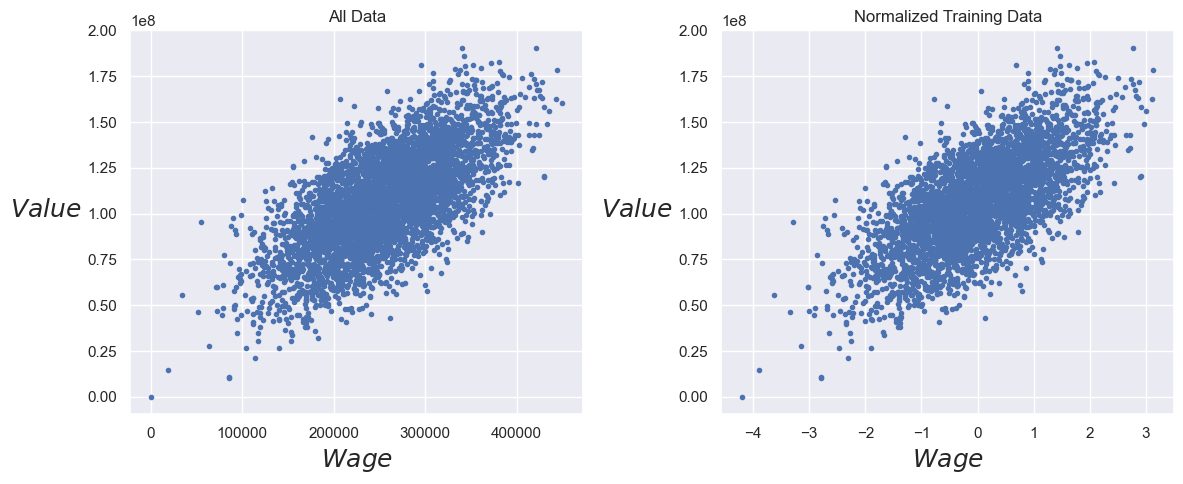

In [15]:
# Answer to Q4.5 - assuming that this is to be done with the normalized training set. They look the same but less variables.
fig, axs = plt.subplots(1, 2, figsize=(12,5))

#First graph
axs[0].plot(X, y, "b.")
#axs[0].plot(X, y_pred, "r-", linewidth=2)
axs[0].set_xlabel("$Wage$", fontsize=18)
axs[0].set_ylabel("$Value$", rotation=0, fontsize=18, labelpad=30)
axs[0].set_title("All Data")

#Second graph
axs[1].plot(X_train_scaled, y_train, "b.")
#axs[1].plot(X_train_scaled, y_train_pred, "r-", linewidth=2)
axs[1].set_xlabel("$Wage$", fontsize=18)
axs[1].set_ylabel("$Value$", rotation=0, fontsize=18, labelpad=30)
axs[1].set_title("Normalized Training Data")

plt.tight_layout()
plt.show()

In [16]:
# Answer to Q4.6
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Non-Normalized R^2 and RMSE:
print("Non-normalized Results:")
r2_slr = r2_score(y, y_pred)
print('R^2 non-normalized: %.3f' %
    r2_slr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Square Error:', rmse)

#Normalized R^2 and RMSE:
print("Normalized Results:")
print('R^2 train: %.3f' %
    (r2_score(y_train, y_train_pred)))
norm_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Square Error:', norm_rmse)


Non-normalized Results:
R^2 non-normalized: 0.468
Root Mean Square Error: 18591498.22306568
Normalized Results:
R^2 train: 0.468
Root Mean Square Error: 18591498.22306568


**# Answer to Q4.7**: 
Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
The machine learning algorithm may work better if the features have very different scales and the normalization brings the scales all within a very similar range. If ranges are very large, there are certain types of algorithms like certain types of gradient descent may get stuck when trying to optimize as they will keep skipping over the proper value. Also, if there are more than one feature then the model will have a hard time being accurate if one of the features scales is much different than the other features, however in this problem we are only working with one feature. (Source: https://www.datacamp.com/tutorial/normalization-in-machine-learning)


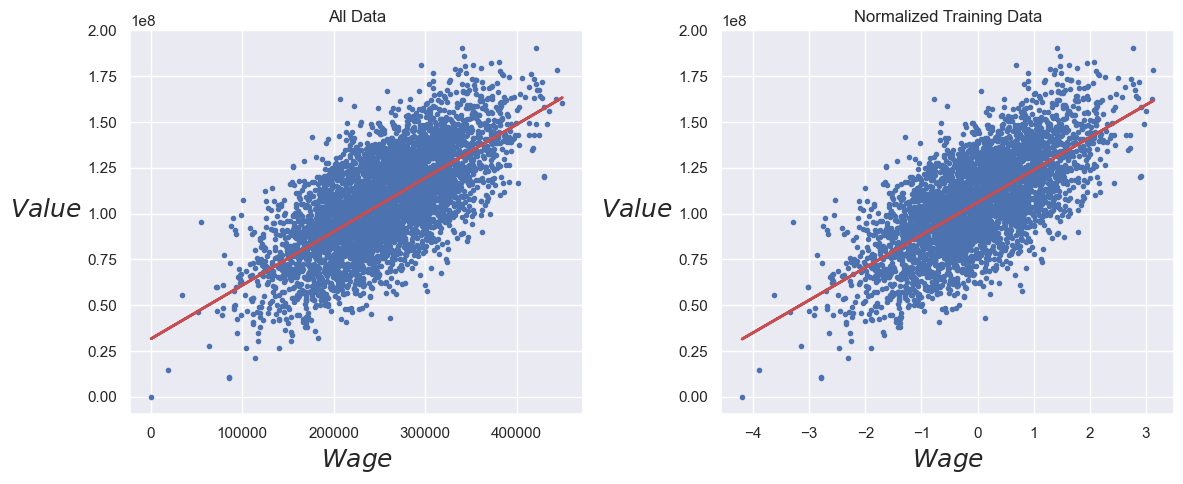

In [17]:
# Answer to Q4.8 - Note: it is assumed that the normalized dataset to be compared is the training set that is normalized
fig, axs = plt.subplots(1, 2, figsize=(12,5))
#First graph
axs[0].plot(X, y, "b.")
axs[0].plot(X, y_pred, "r-", linewidth=2)
axs[0].set_xlabel("$Wage$", fontsize=18)
axs[0].set_ylabel("$Value$", rotation=0, fontsize=18, labelpad=30)
axs[0].set_title("All Data")

#Second graph
axs[1].plot(X_train_scaled, y_train, "b.")
axs[1].plot(X_train_scaled, y_train_pred, "r-", linewidth=2)
axs[1].set_xlabel("$Wage$", fontsize=18)
axs[1].set_ylabel("$Value$", rotation=0, fontsize=18, labelpad=30)
axs[1].set_title("Normalized Training Data")

plt.tight_layout()
plt.show()

**# Answer to Q4.9**:
What could cause a simple linear regression model to perform poorly, even if the correlation is high?
If the correlation is high, it could still perform poorly if the relationship is not linear and the actual data is far from 
the predicted values but still linear. It could also have one extreme point that makes the whole thing have a high correlation value but in reality the model may not be a true linear relationship.

# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.2, 0.4, and 0.6).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

In [18]:
# Answer to Q5.1
thresholds = [0.26, 0.36, 0.46]
results = []

for t in thresholds:
    # pick correlated features
    selected = value_corr[value_corr.abs() >= t].sort_values(key=abs, ascending=False).round(3)
    results.append(selected)

#print("0.26 Threshold:\n", results[0])
#print("\n0.36 Threshold:\n", results[1])
#print("\n0.46 Threshold:\n", results[2])

cols1 = results[0].index.tolist()
cols2 = results[1].index.tolist()
cols3 = results[2].index.tolist()

X1 = player_data[['Wage', 'Potential', 'Overall', 'International Reputation']]
y1 = player_data[['Value']]
X2 = player_data[['Wage', 'Potential', 'Overall']]
y2 = player_data[['Value']]
X3 = player_data[['Wage', 'Potential']]
y3 = player_data[['Value']]

X1_train, X1_test, y1_train, y1_test = train_test_split(
 X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(
 X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(
 X3, y3, test_size=0.2, random_state=42)

#X1_train = player_data.loc[:, cols1]
#X2_train = player_data.loc[:, cols2]
#X3_train = player_data.loc[:, cols3]

In [19]:
# Answer to Q5.2 (assume we don't care about using train/test sets because it is not specified)

#sanity check
print("X1 cols:", list(X1_train.columns))
print("X2 cols:", list(X2_train.columns))
print("X3 cols:", list(X3_train.columns))

#0.26 threshold
reg_model1 = LinearRegression().fit(X1_train, y1_train)

#0.36 threshold
reg_model2 = LinearRegression().fit(X2_train, y2_train)

#0.46 threshold
reg_model3 = LinearRegression().fit(X3_train, y3_train)

X1 cols: ['Wage', 'Potential', 'Overall', 'International Reputation']
X2 cols: ['Wage', 'Potential', 'Overall']
X3 cols: ['Wage', 'Potential']


In [20]:
#Answer to Q5.3:
#0.26 threshold
y_pred1 = reg_model1.predict(X1_test)
rmse1 = np.sqrt(metrics.mean_squared_error(y1_test, y_pred1))
r2_score_4features = r2_score(y1_test, y_pred1)
print('\nRoot Mean Square Error:', rmse1)
print("T1 R^2:", r2_score_4features)

#0.36 threshold
y_pred2 = reg_model2.predict(X2_test)
rmse2 = np.sqrt(metrics.mean_squared_error(y2_test, y_pred2))
r2_score_3features = r2_score(y2_test, y_pred2)
print('\nRoot Mean Square Error:', rmse2)
print("T2 R^2:", r2_score_3features)

#0.46 threshold
y_pred3 = reg_model3.predict(X3_test)
rmse3 = np.sqrt(metrics.mean_squared_error(y3_test, y_pred3))
r2_score_2features = r2_score(y3_test, y_pred3)
print('\nRoot Mean Square Error:', rmse3)
print("T3 R^2:", r2_score_2features)


Root Mean Square Error: 13585924.818174921
T1 R^2: 0.7150516233204207

Root Mean Square Error: 14060756.445040336
T2 R^2: 0.6947855123234726

Root Mean Square Error: 15856582.981493725
T3 R^2: 0.6118433932777966


**# Answer to Q5.4**: 
How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?
When deciding which features to use in a multiple linear regression model, we have to consider first which features we will have access to 
when building the models and we need to determine if any features need to be taken out. Also, features that are highly correlated with each
other should be evaluated as to whether one should be taken out as these are somewhat redundant for the model. Features with very small variance should be dropped as they may not provide a lot of information for the model. When training on too many features, there are problems that arise such as overfitting which will likely be very accurate for the training but not very good for the test, then there is also multicolinearity which occurs when there are features that contain very similar information and causes the coefficients to become unstable. (Source: https://www.geeksforgeeks.org/machine-learning/feature-selection-techniques-in-machine-learning/)

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

In [21]:
# Answer to Q6.1
print(f"SLR_model -> R²: {r2_slr:.4f}, RMSE: {rmse:.4f}")
print(f"MLR_model_4features -> R²: {r2_score_4features:.4f}, RMSE: {rmse1:.4f}")
print(f"MLR_model_3features -> R²: {r2_score_3features:.4f}, RMSE: {rmse2:.4f}")
print(f"MLR_model_2features -> R²: {r2_score_2features:.4f}, RMSE: {rmse3:.4f}")

SLR_model -> R²: 0.4677, RMSE: 18591498.2231
MLR_model_4features -> R²: 0.7151, RMSE: 13585924.8182
MLR_model_3features -> R²: 0.6948, RMSE: 14060756.4450
MLR_model_2features -> R²: 0.6118, RMSE: 15856582.9815


**Answer to Q6.2**: 
The best performance in terms of high R^2 and low RMSE is the 4 feature model, which predicts the Value the best because adding
features as long as they are not redundant provides more information for the model to use, but adding more features usually hits
a limit where it stops being very useful anymore.

**Answer to Q6.3**: 
If a model has a large R^2 but low RMSE, this would suggest that the model is able to explain the pattern of the 
data but the model still has a high value of error sums. This is due to things like target scale if target has very large 
values which will add up quickly, or it can be caused by a few very large outliers in the data.

**Answer to Q6.4**: 

# Q7 - GenAI

1. **Discussion Question:** Did you use GenAI and if so, how?
2. **Discussion Question:** What limitations did you encounter and how did you overcome them?

**Answer to Q7.1**: 
I used GenAI to explain the code from the labs for me so that I could implement it into this assignment, and so I knew what
all of the function arguments and outputs would be as I have never worked with machine learning models before. It also gave me the
normalization function which I did not see in the lab tutorials.

**Answer to Q7.2**: 
Limitations I encountered were errors in my code that I took a long time to fix, such as getting a perfect R^2 value
from the training and evalution of my different data sets. I had to change my code to then make sure 'Value' was
the only feature in the y_test which I figured out by printing the data at each step of the process to see where the
error was occurring. The other limitation that I had was the instructions for this assignment being very unclear and I was not
sure where I had to use my test or train data set so I had to assume based on my knowledge, but I'm not sure I actually followed
all of the instructions properly because there were many ways to interpret them.